In [1]:
import os
import pandas as pd

In [2]:
l3_pre=['next_line','no']
l2_pre=['ip_stride','next_line','no']
l1_pre=['next_line','no']
replacement=['lru','ship','srrip','drrip']
trace_code = ['436','437','450','462','482']
config = [l1+'-'+l2+'-'+l3+'-'+rep  for l3 in l3_pre for l2 in l2_pre for l1 in l1_pre for rep in replacement]

In [3]:
res_list = os.listdir('res')

In [4]:
blank_list = [ [0 for i in range(len(trace_code))] for j in range(len(config))]

In [5]:
IPC = pd.DataFrame(blank_list,index=config,columns= trace_code)

In [6]:
for trace_res in res_list:
    dir = 'res/'+trace_res+'/'
    log_list = os.listdir(dir)
    for log in log_list:
        test_config = log.split('-')
        trace_code = test_config[0]
        l1_pref = test_config[1]
        l2_pref = test_config[2]
        l3_pref = test_config[3]
        repl = test_config[4].split('.')[0]
        log_config = l1_pref+'-'+l2_pref+'-'+l3_pref+'-'+repl
        with open(dir+log,'r') as f:
            lines = f.readlines()
            for line in lines:
                if line[0:8] == "Finished":
                    t = line.find("IPC")
                    res = float(line[t+5:t+12])
                    log_index = config.index(log_config)
                    IPC.loc[log_config,trace_code] = res
                    #print("score: %f"  %( float(line[t+5:t+12])))



In [7]:
IPC = IPC.sort_index()

In [11]:
IPC['avg'] = round(IPC.mean(axis=1),5)

In [13]:
IPC.to_csv('IPC_origin.csv')

In [14]:
IPC_sort = IPC.sort_values(by = 'avg', ascending = False)

In [15]:
IPC_sort

,436,437,450,462,482,459,avg
next_line-ip_stride-next_line-drrip,0.39357,0.98802,0.37274,0.70679,1.25477,0.91745,0.77222
next_line-ip_stride-next_line-lru,0.39361,0.98675,0.37568,0.72553,1.19622,0.92179,0.76660
next_line-ip_stride-next_line-ship,0.39358,0.98839,0.38446,0.68971,1.22407,0.91511,0.76589
next_line-ip_stride-next_line-srrip,0.39375,0.98888,0.38263,0.67658,1.23575,0.91169,0.76488
next_line-ip_stride-no-ship,0.39363,0.95320,0.38524,0.67352,1.26065,0.85670,0.75382
next_line-ip_stride-no-drrip,0.39379,0.95948,0.38872,0.64779,1.25869,0.85137,0.74997
no-ip_stride-next_line-ship,0.38999,0.96955,0.36566,0.72366,1.12422,0.87452,0.74127
no-ip_stride-next_line-drrip,0.38998,0.96180,0.35511,0.72605,1.13775,0.87540,0.74102
no-ip_stride-next_line-lru,0.39003,0.95811,0.35777,0.75466,1.09569,0.88233,0.73976
next_line-ip_stride-no-srrip,0.39364,0.96246,0.37558,0.65845,1.19479,0.85010,0.73917


In [16]:
IPC_sort.to_csv('IPC_sort.csv')

<Axes: >

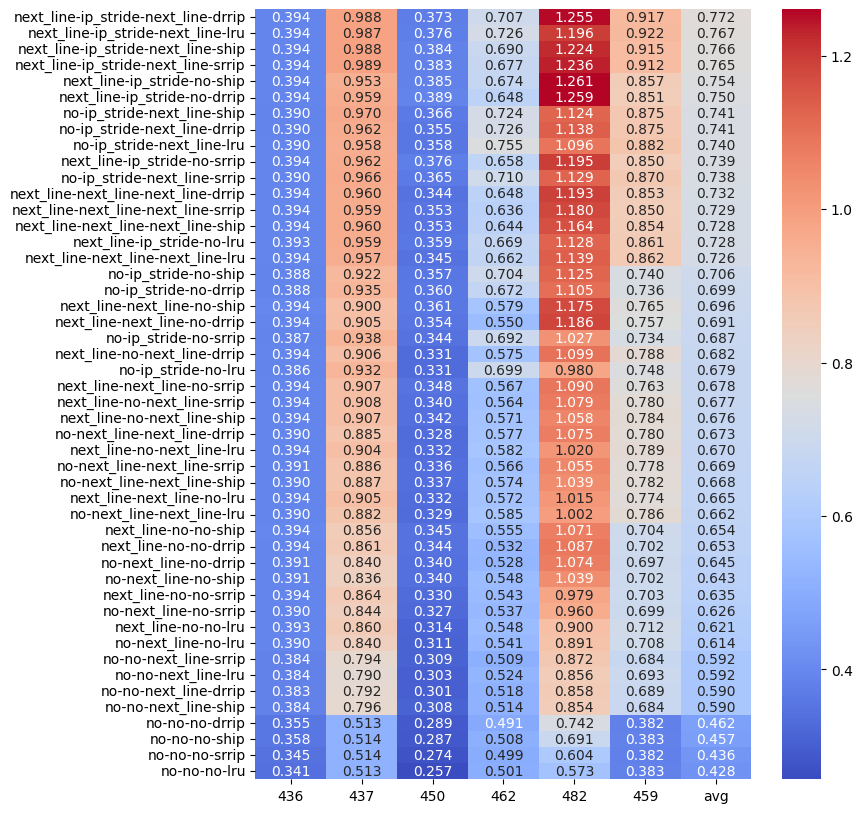

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
sns.heatmap(IPC_sort,cmap='coolwarm',annot=True,fmt='.3f')

In [26]:
IPC_agg = IPC.reset_index()

In [33]:
IPC_config = IPC_agg['index'].str.split('-',expand=True)

In [35]:
IPC_config.columns = ['l1_pref','l2_pref','l3_pref','replacement']

In [39]:
IPC_detailed = pd.concat([IPC_config,IPC_agg],axis=1).drop('index',axis=1)

In [48]:
IPC_detailed.head()

,l1_pref,l2_pref,l3_pref,replacement,436,437,450,462,482,459,avg
0,next_line,ip_stride,next_line,drrip,0.39357,0.98802,0.37274,0.70679,1.25477,0.91745,0.77222
1,next_line,ip_stride,next_line,lru,0.39361,0.98675,0.37568,0.72553,1.19622,0.92179,0.76660
2,next_line,ip_stride,next_line,ship,0.39358,0.98839,0.38446,0.68971,1.22407,0.91511,0.76589
3,next_line,ip_stride,next_line,srrip,0.39375,0.98888,0.38263,0.67658,1.23575,0.91169,0.76488
4,next_line,ip_stride,no,drrip,0.39379,0.95948,0.38872,0.64779,1.25869,0.85137,0.74997


In [51]:
repl_score = IPC_detailed.groupby('replacement').agg({'avg':'mean'}).sort_values('avg',ascending=False)
repl_score

,avg
replacement,
drrip,0.674207
ship,0.673207
srrip,0.664353
lru,0.657691


In [52]:
repl_score.to_csv('repl_score.csv')

In [53]:
l1_pref_score = IPC_detailed.groupby('l1_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l1_pref_score

,avg
l1_pref,
next_line,0.706465
no,0.628264


In [56]:
l2_pref_score = IPC_detailed.groupby('l2_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l2_pref_score

,avg
l2_pref,
ip_stride,0.735784
next_line,0.677767
no,0.588542


In [60]:
l3_pref_score = IPC_detailed.groupby('l3_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l3_pref_score

,avg
l3_pref,
next_line,0.695261
no,0.639468


In [61]:
l1_pref_score.to_csv('l1_pref_score.csv')
l2_pref_score.to_csv('l2_pref_score.csv')
l3_pref_score.to_csv('l3_pref_score.csv')

<Axes: xlabel='l3_pref', ylabel='avg'>

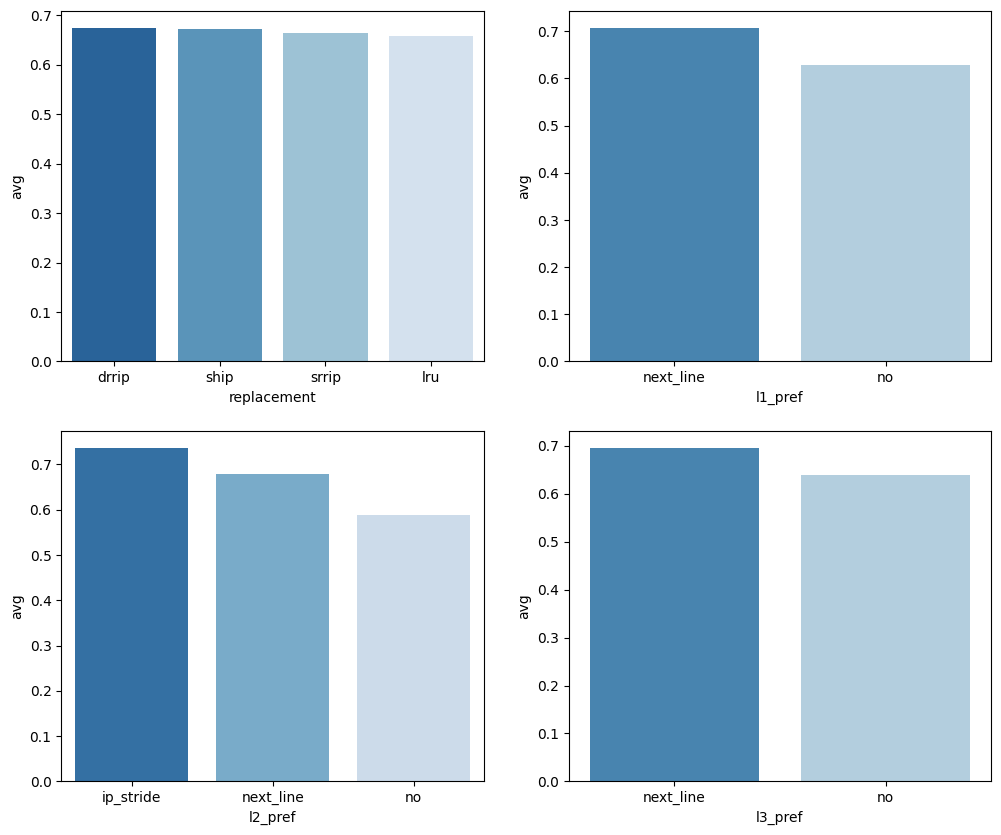

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(y=repl_score['avg'],x=repl_score.index,ax=axes[0,0],palette='Blues_r')
sns.barplot(y=l1_pref_score['avg'],x=l1_pref_score.index,ax=axes[0,1],palette='Blues_r')
sns.barplot(y=l2_pref_score['avg'],x=l2_pref_score.index,ax=axes[1,0],palette='Blues_r')
sns.barplot(y=l3_pref_score['avg'],x=l3_pref_score.index,ax=axes[1,1],palette='Blues_r')
